In [14]:
import pandas as pd 
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error

#wczytanie danych do datasetu pandas
dataset = pd.read_csv('./datasets/DOT.csv',delimiter=",", header = 0)
y = dataset.iloc[:,0]
X = dataset.iloc[:,3:]

#train_test_split gotowa funkcja do podzielenia bazy do medelu na część trenującą i uczącą
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
X_all = xgb.DMatrix(X)
X_train_D = xgb.DMatrix(X_train)
X_test_D = xgb.DMatrix(X_test)
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [12]:

#inicjujemy model i podajemy parametry modelu
param = {
    'booster': 'gbtree',
    'objective': 'binary:logistic', 
    #'colsample_bytree': 0.3, 
    #'learning_rate': 0.1, 
    'min_split_loss': 1, 
    'max_depth':7, 
    #'n_estimators': 80,
    #'min_child_weight': 33,
    
    }
steps = 100
#trenujemy model na danych trenujących
xg_reg = xgb.train(param, D_train, steps)
#wyciągamy dane z modelu dla
preds = xg_reg.predict(X_test_D)
preds2 = xg_reg.predict(X_train_D)
pred_all = xg_reg.predict(X_all)
#liczymy średni błąd kwadratowy
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse2 = np.sqrt(mean_squared_error(y_train, preds2))
print("Test RMSE: %f", rmse)
print("Train RMSE: %f", rmse2)
np.savetxt(r"/home/patryk/prediction/datasets/predykcja_btc.csv", pred_all, delimiter=",")
#np.savetxt(r"N:\Users\Poland\Shared Documents\Debt Collection\COLLECTION_STRATEGY_TEAM\Patryk FF\y_test.csv", y_test, delimiter=",")

from sklearn.metrics import confusion_matrix

Test RMSE: %f 0.13496514191657447
Train RMSE: %f 0.137872467131778


In [13]:
from sklearn.metrics import confusion_matrix
preds_binary = np.array(preds)
preds_binary = preds_binary > 0.5
preds_binary = preds_binary.astype(int)

cm=confusion_matrix(y_test, preds_binary)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("False positive cases:", FP)
print("False negative cases:", FN)
print("True positive cases:", TP)
print("True negative cases:", TN)
print("//////////////////////////////////////////////")
print("True positive rate:", "{0:0f}%".format(TPR*100))
print("True negative rate:", "{0:0f}%".format(TNR*100))
print("Positive prediction value:", "{0:0f}%".format(PPV*100))
print("Negative predictive value:", "{0:0f}%".format(NPV*100))
print("False positive rate:", "{0:0f}%".format(FPR*100))
print("False negative rate:", "{0:0f}%".format(FNR*100))
print("False discovery rate:", "{0:0f}%".format(FDR*100))
print("//////////////////////////////////////////////")
print("Accuracy:", "{0:0f}%".format(ACC*100))

False positive cases: 0
False negative cases: 0
True positive cases: 1
True negative cases: 3
//////////////////////////////////////////////
True positive rate: 100.000000%
True negative rate: 100.000000%
Positive prediction value: 100.000000%
Negative predictive value: 100.000000%
False positive rate: 0.000000%
False negative rate: 0.000000%
False discovery rate: 0.000000%
//////////////////////////////////////////////
Accuracy: 100.000000%


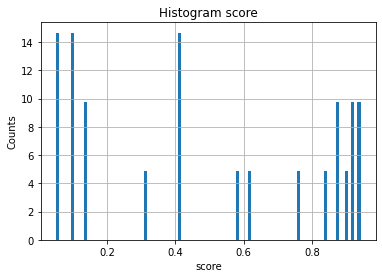

In [9]:
#histogram dla zmiennej objaśniającej
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(preds, density=True, bins=100)  # `density=False` would make counts
plt.ylabel('Counts')
plt.xlabel('score')
plt.title('Histogram score')
plt.grid(True)
plt.show()

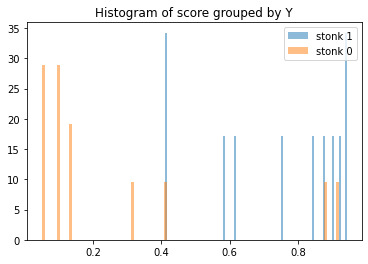

In [10]:
df_hist2 = np.vstack([preds,y_test]).T
df_hist = pd.DataFrame(df_hist2)

is_norm = df_hist[1]==1
df1 = df_hist2[is_norm]

is_n_norm = df_hist[1]==0
df2 = df_hist2[is_n_norm]

dx = df1[:,0]
dy = df2[:,0]

plt.hist(dx, density=True, alpha=0.5, bins=100, label=['stonk 1'])
plt.hist(dy, density=True, alpha=0.5, bins=100, label=['stonk 0'])
plt.legend(loc='upper right')
plt.title('Histogram of score grouped by Y')
plt.show()